In [18]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from matplotlib.font_manager import FontProperties

In [5]:
data = pd.read_csv("dengue.csv").dropna()
predictors=['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']

In [3]:
X = (data[predictors] - np.mean(data[predictors]))/np.std(data[predictors])
X=np.array(X)
data[predictors].describe()

,humid,temp,h10pix,trees,Xmin,Ymin
count,1986.000000,1986.000000,1986.000000,1986.00000,1986.00000,1986.000000
mean,16.701147,18.438572,21.208138,22.72432,13.62286,19.844663
std,7.326829,8.016008,7.333025,23.87830,61.97238,23.397451
min,0.671389,-13.741700,4.357778,0.00000,-179.50000,-54.500000
25%,10.014758,11.117700,14.584720,1.00000,-11.00000,6.000000
50%,16.129888,20.970799,23.114865,15.00000,16.50000,18.000000
75%,23.618363,25.478112,28.508890,37.00000,42.50000,39.000000
max,30.266500,29.450001,31.134171,85.00000,178.00000,82.500000


In [4]:
K = range(1,20)
Sum_of_squared_distances = []
score = np.zeros(len(K))
for k in K:
    km = KMeans(n_clusters=k)
    KM = km.fit(X)
    try:
        cluster_labels = km.fit_predict(X)
        score[k-2] = silhouette_score(X, cluster_labels)
        Sum_of_squared_distances.append(KM.inertia_)
    except:
        Sum_of_squared_distances.append(KM.inertia_)
    print("For n_clusters =", k,"The average silhouette_score is :", score[k-2])

For n_clusters = 1 The average silhouette_score is : 0.0
For n_clusters = 2 The average silhouette_score is : 0.40811225183136585
For n_clusters = 3 The average silhouette_score is : 0.32846919236676136
For n_clusters = 4 The average silhouette_score is : 0.31718631031237315
For n_clusters = 5 The average silhouette_score is : 0.2784023734482286
For n_clusters = 6 The average silhouette_score is : 0.3082599788554651
For n_clusters = 7 The average silhouette_score is : 0.29256103691497093
For n_clusters = 8 The average silhouette_score is : 0.29807276463860527
For n_clusters = 9 The average silhouette_score is : 0.3070534587777998
For n_clusters = 10 The average silhouette_score is : 0.3170433310777378
For n_clusters = 11 The average silhouette_score is : 0.31216671070202945
For n_clusters = 12 The average silhouette_score is : 0.31430435938911094
For n_clusters = 13 The average silhouette_score is : 0.3093731242826371
For n_clusters = 14 The average silhouette_score is : 0.323505817440

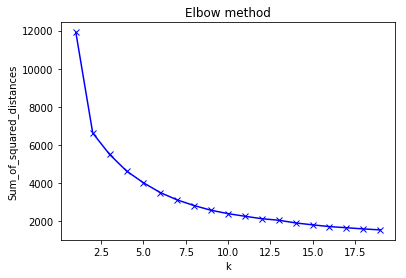

In [5]:
K_prime = range(1,20)
plt.plot(K_prime, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method')
plt.show()

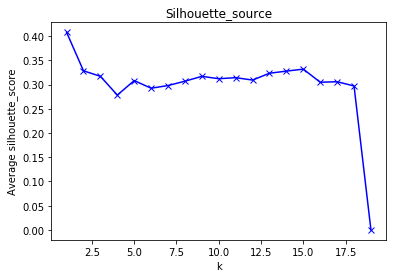

In [7]:
plt.plot(K, score, 'bx-')
plt.xlabel('k')
plt.ylabel('Average silhouette_score')
plt.title('Silhouette_source')
plt.show()

Entonces de ambas gráficas se obtiene que el numero optimo de cluster es 2

In [47]:
data2 = pd.read_csv("BreadBasket_DMS.csv").dropna()

In [48]:
data2["Time"] =pd.to_datetime(data2.Time)
data2["Date"] =pd.to_datetime(data2.Date)
data2["Time_2"] = data2.Time.dt.hour
data2['Year'] = data2.Date.dt.year
data2["Month"] = data2.Date.dt.month
data2['Day'] = data2.Date.dt.day
features2 = ["Time_2","Year","Month","Month","Transaction"]
data2[features2]=(data2[features2]-np.mean(data2[features2]))/np.std(data2[features2])

In [ ]:
#esto es solo para ver el numero de ventas de cada producto como funcion del mes
Dict_item = {}
for i in set(data2["Item"]):
    a = data2[data2["Item"]==i]
    month = list(a.Date.dt.month)
    veces = {}
    for m in range(1,13):
        veces[m] = month.count(m)
    Dict_item[i] = veces

In [32]:
X = np.array(data2[features2])
Item = np.array(data2["Item"])
X2, X1, y_train, item1 = train_test_split(X, Item, test_size=0.05)

In [33]:
pca1 = PCA()
pca1.fit(X1)
comp = pca1.components_

In [34]:
fig = plt.figure(figsize = (17,17))
ax = fig.add_subplot(1,1,1) 
trans = pca1.fit_transform(X1)
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline','rotation':0}
font0 = FontProperties()
for i in range(len(X1)):
    ax.scatter(trans[i,0],trans[i,1],s=10)

plt.plot([0.,comp[0,0]],[0.,4*comp[1,0]],c='Chocolate')
plt.text(comp[0,0], 4*comp[1,0], 'time', fontsize=12,color='Chocolate',fontproperties=font0,**alignment)
plt.plot([0.,comp[0,1]],[0.,4*comp[1,1]],c='Chocolate')
plt.text(comp[0,1], 4*comp[1,1], 'date', fontsize=12,color='Chocolate',fontproperties=font0,**alignment)
plt.plot([0.,comp[0,2]],[0.,4*comp[1,2]],c='Chocolate')
plt.text(comp[0,2], 4*comp[1,2], 'Transaction', fontsize=12,color='Chocolate',fontproperties=font0,**alignment) 
plt.plot([0.,comp[0,0]],[0.,4*comp[1,0]],c='Chocolate')
plt.text(comp[0,0], 4*comp[1,0], 'time', fontsize=12,color='Chocolate',fontproperties=font0,**alignment)
plt.plot([0.,comp[0,1]],[0.,4*comp[1,1]],c='Chocolate')
plt.text(comp[0,1], 4*comp[1,1], 'date', fontsize=12,color='Chocolate',fontproperties=font0,**alignment)
plt.plot([0.,comp[0,2]],[0.,4*comp[1,2]],c='Chocolate')
plt.text(comp[0,2], 4*comp[1,2], 'Transaction', fontsize=12,color='Chocolate',fontproperties=font0,**alignment)


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0,linestyle='--',linewidth=0.7)
plt.axvline(0,linestyle='--',linewidth=0.7)
#plt.legend()
plt.show()

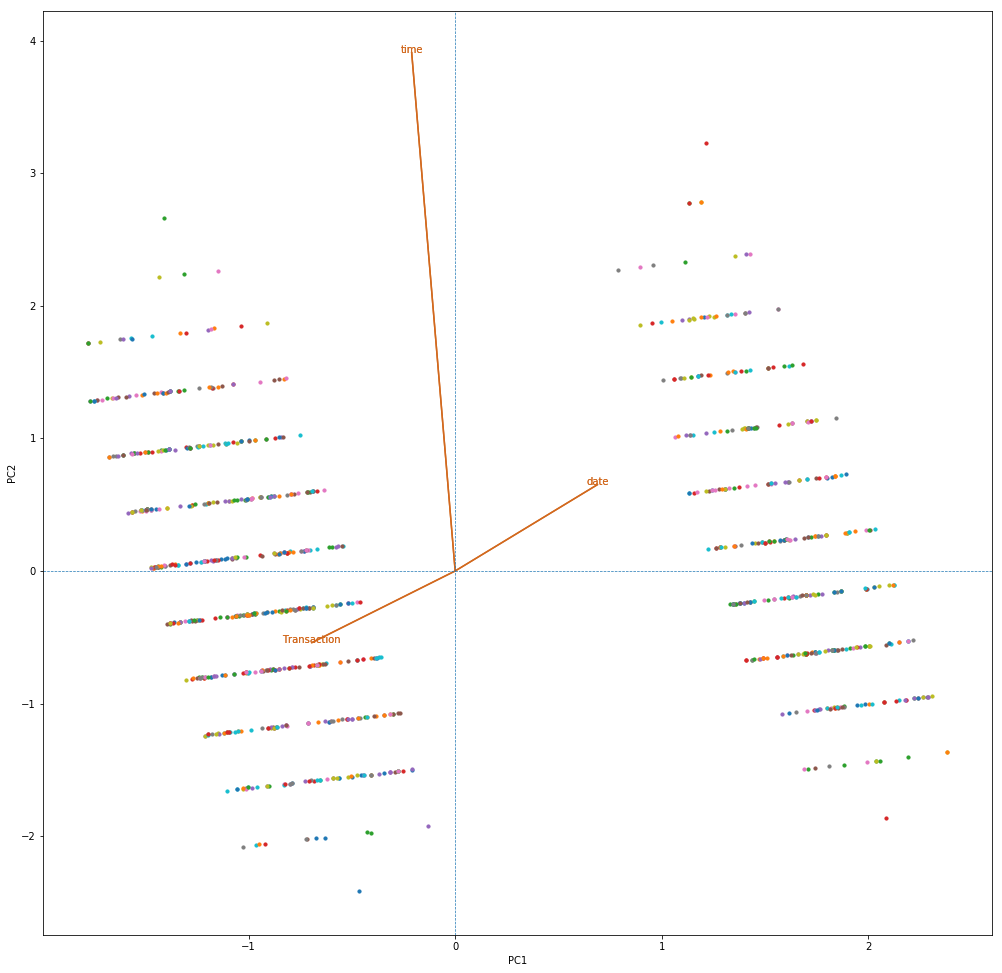

In [35]:
plt.figure(figsize=(14,14))
for i in Dict_item.keys():
    plt.scatter(Dict_item[i].keys(),Dict_item[i].values())
    #plt.text(dic_item[i].keys(),dic_item[i].values(),i,fontsize=12,color='DodgerBlue')
#plt.legend()
plt.xlabel('Month')
plt.ylabel('Sells per item')
plt.show()

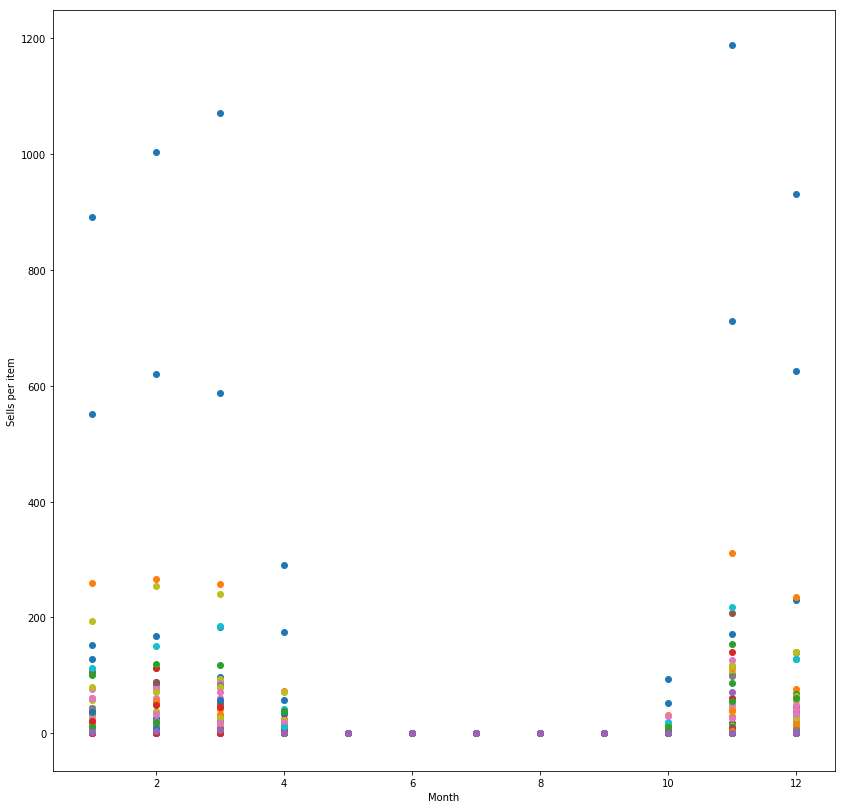

In [36]:
K = range(1,30)
Sum_of_squared_distances = []
score = np.zeros(len(K))
for k in K:
    km = KMeans(n_clusters=k)
    KM = km.fit(X1)
    try:
        cluster_labels = km.fit_predict(X1)
        score[k-2] = silhouette_score(X1, cluster_labels)
        Sum_of_squared_distances.append(KM.inertia_)
    except:
        Sum_of_squared_distances.append(KM.inertia_)
    #print("For n_clusters =", k,"The average silhouette_score is :", score[k-2])

In [42]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method')
plt.show()

For n_clusters = 1 The average silhouette_score is : 0.0
For n_clusters = 2 The average silhouette_score is : 0.5395912515207831
For n_clusters = 3 The average silhouette_score is : 0.4621034876127408
For n_clusters = 4 The average silhouette_score is : 0.4509260565221548
For n_clusters = 5 The average silhouette_score is : 0.4182217305565303
For n_clusters = 6 The average silhouette_score is : 0.42225812007728697
For n_clusters = 7 The average silhouette_score is : 0.3711411864762802
For n_clusters = 8 The average silhouette_score is : 0.3884920185975177
For n_clusters = 9 The average silhouette_score is : 0.39089493173753775
For n_clusters = 10 The average silhouette_score is : 0.38002815701378956
For n_clusters = 11 The average silhouette_score is : 0.3733128160149113
For n_clusters = 12 The average silhouette_score is : 0.378590921794291
For n_clusters = 13 The average silhouette_score is : 0.3707632532575797
For n_clusters = 14 The average silhouette_score is : 0.3738157373173462


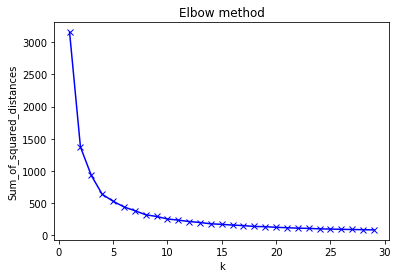

In [43]:
plt.plot(K, score, 'bx-')
plt.xlabel('k')
plt.ylabel('Average silhouette_score')
plt.title('Silhouette_source')
plt.show()

In [50]:
#como funcion de la fecha en anos
X11 = np.array(data2[['Time_2','Year','Transaction']])
item = np.array(data2['Item'])
X2, X1, y_train, item1 = train_test_split(X11, item, test_size=0.05)

In [51]:
pca1 = PCA()
pca1.fit(X1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
comp = pca1.components_

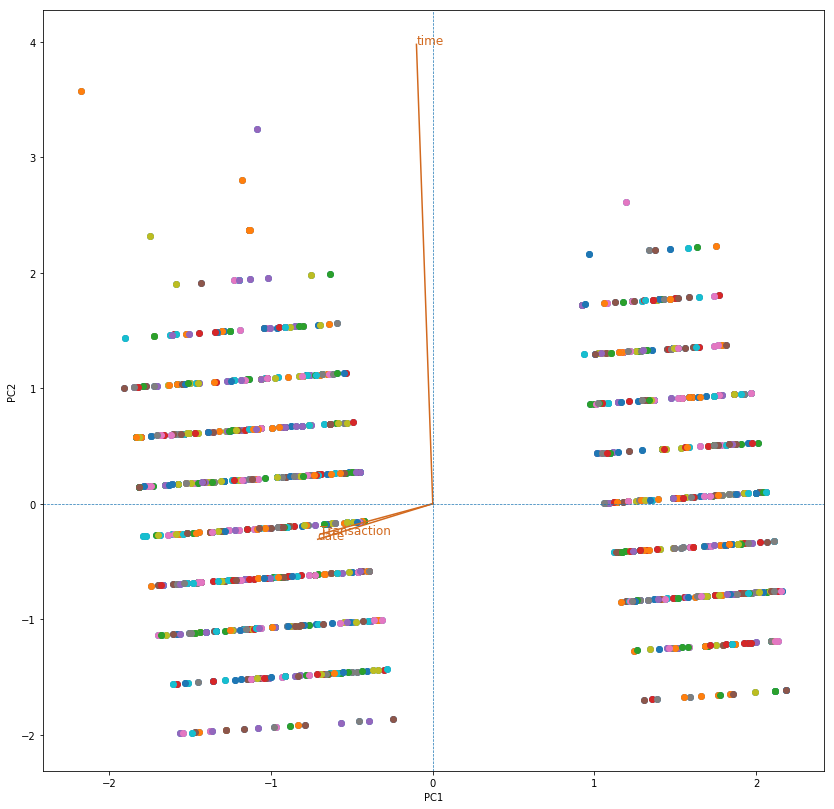

In [53]:
plt.figure(figsize=(14,14))
trans1 = pca1.fit_transform(X1)
plt.scatter(trans1[:,0],trans1[:,1])
for i in range(len(trans1)):
    plt.scatter(trans1[i,0],trans1[i,1])
    #plt.text(trans1[i,0],trans1[i,1], item[i], fontsize=12,color='DodgerBlue')
    
plt.plot([0.,comp[0,0]],[0.,4*comp[1,0]],c='Chocolate')
plt.text(comp[0,0], 4*comp[1,0], 'time', fontsize=12,color='Chocolate')
plt.plot([0.,comp[0,1]],[0.,4*comp[1,1]],c='Chocolate')
plt.text(comp[0,1], 4*comp[1,1], 'date', fontsize=12,color='Chocolate')
plt.plot([0.,comp[0,2]],[0.,4*comp[1,2]],c='Chocolate')
plt.text(comp[0,2], 4*comp[1,2], 'Transaction', fontsize=12,color='Chocolate')


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0,linestyle='--',linewidth=0.7)
plt.axvline(0,linestyle='--',linewidth=0.7)
#plt.legend()
plt.show()

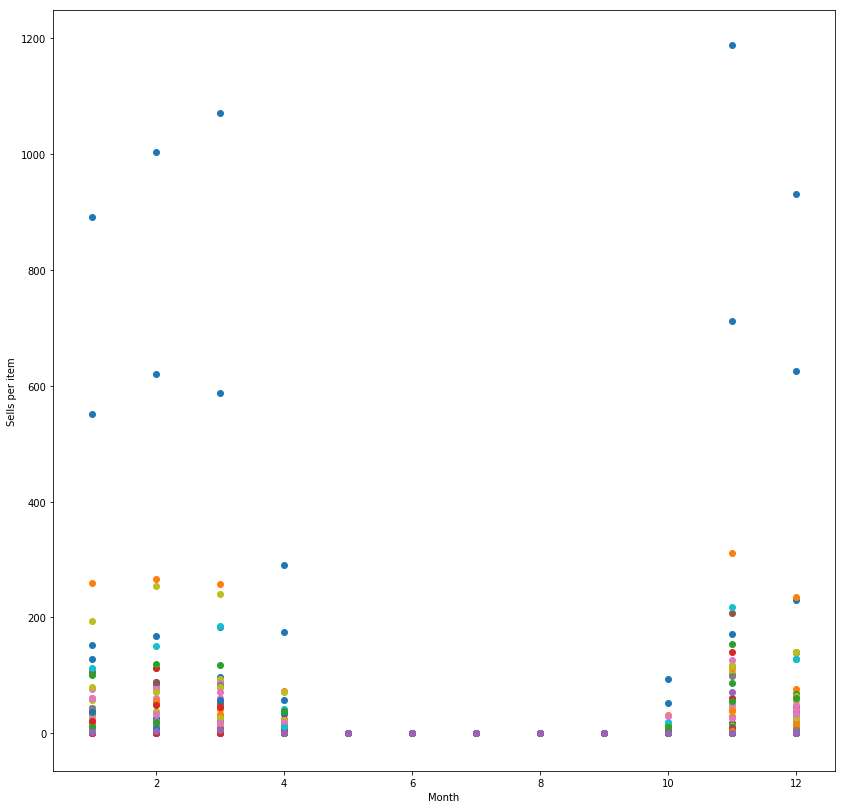

In [10]:
Dict_item = {}
for i in set(data2["Item"]):
    a = data2[data2["Item"]==i]
    month = list(a.Date.dt.month)
    veces = {}
    for m in range(1,13):
        veces[m] = month.count(m)
    Dict_item[i] = veces

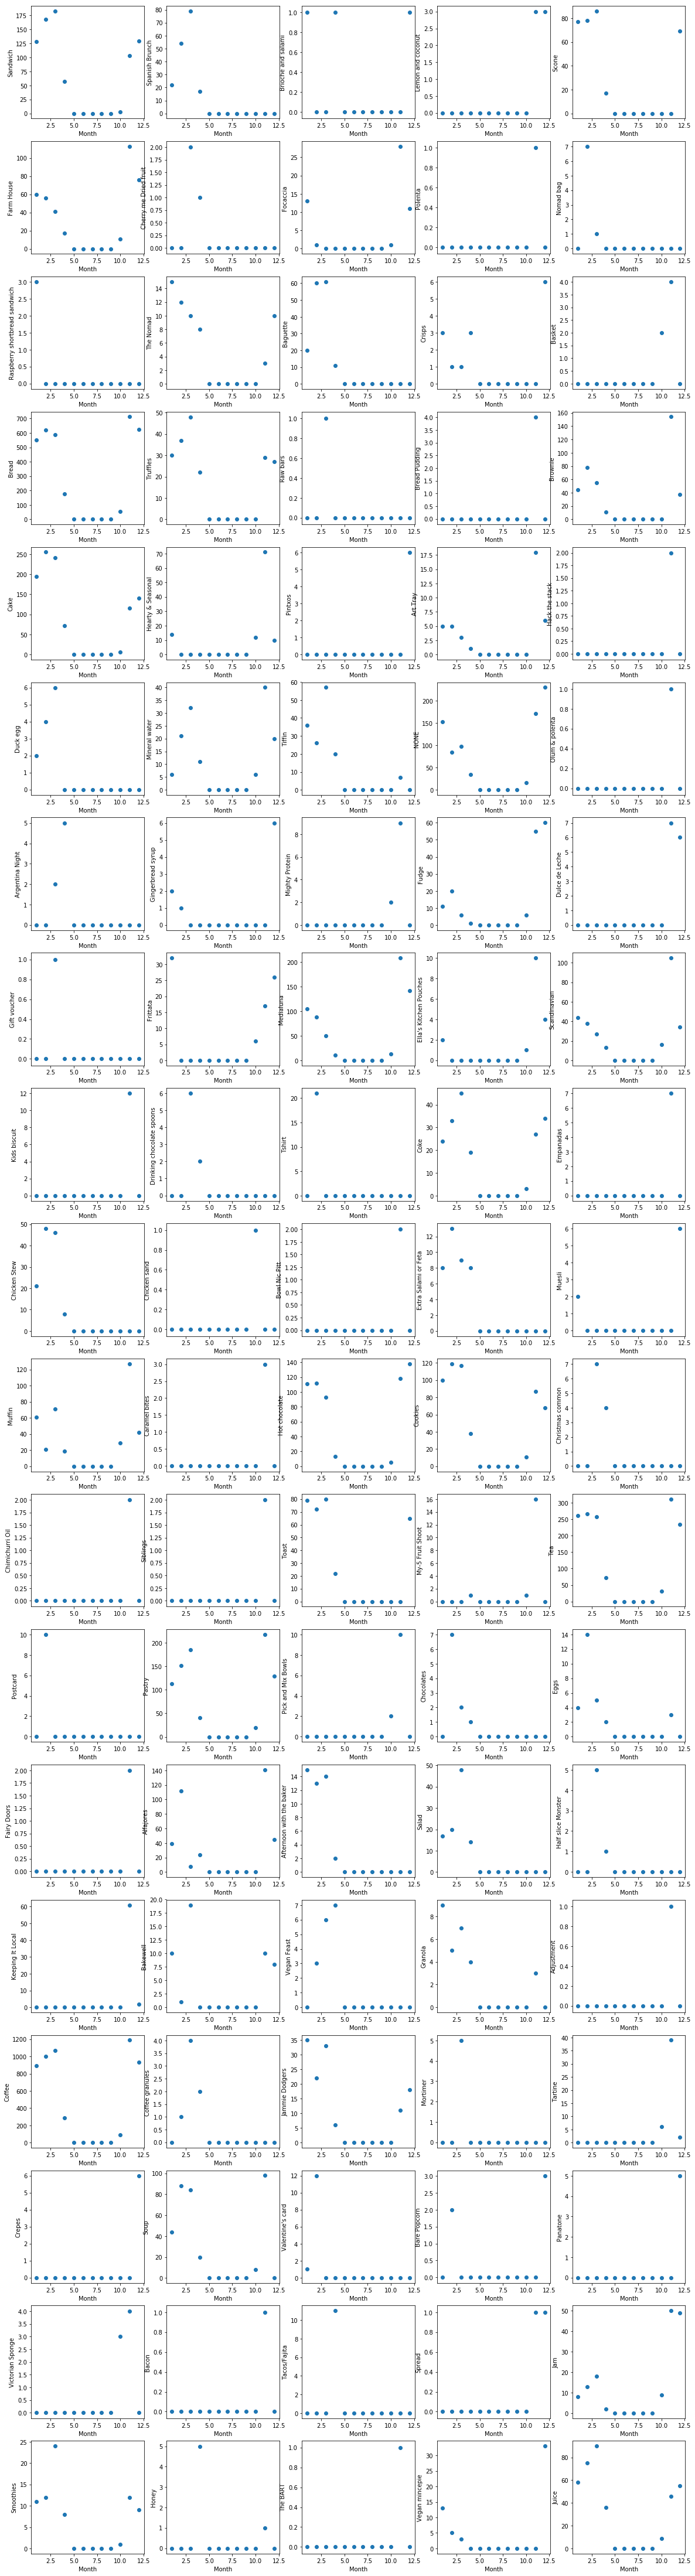

In [11]:
plt.figure(figsize=(20,80))
k=1
for i in Dict_item.keys():
    plt.subplot(19,5,k)
    plt.scatter(Dict_item[i].keys(),Dict_item[i].values())
    plt.xlabel("Month")
    plt.ylabel(i)
    k += 1

In [89]:
for i in sorted(Dict_item.keys()):
    inverse = [(value, key) for key, value in Dict_item[i].items()]
    #print(inverse[int(np.argmax(inverse)/2)][1])
    print("El producto ",i," se vende un maximo de veces",np.max(inverse)," en el mes ",inverse[int(np.argmax(inverse)/2)][1] )

El producto  Adjustment  se vende un maximo de veces 12  en el mes  12
El producto  Afternoon with the baker  se vende un maximo de veces 15  en el mes  1
El producto  Alfajores  se vende un maximo de veces 141  en el mes  11
El producto  Argentina Night  se vende un maximo de veces 12  en el mes  12
El producto  Art Tray  se vende un maximo de veces 18  en el mes  11
El producto  Bacon  se vende un maximo de veces 12  en el mes  12
El producto  Baguette  se vende un maximo de veces 61  en el mes  3
El producto  Bakewell  se vende un maximo de veces 19  en el mes  3
El producto  Bare Popcorn  se vende un maximo de veces 12  en el mes  12
El producto  Basket  se vende un maximo de veces 12  en el mes  12
El producto  Bowl Nic Pitt  se vende un maximo de veces 12  en el mes  12
El producto  Bread  se vende un maximo de veces 712  en el mes  11
El producto  Bread Pudding  se vende un maximo de veces 12  en el mes  12
El producto  Brioche and salami  se vende un maximo de veces 12  en el m

In [73]:
data2['time'] = data2.Time.dt.hour
data2['date'] = data2.Time.dt.hour
X11 = np.array(data2[['time','date']])
item = np.array(data2['Item'])
X2, X1, y_train, item1 = train_test_split(X11, item, test_size=0.01)


In [74]:
pca1 = PCA()
pca1.fit(X1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

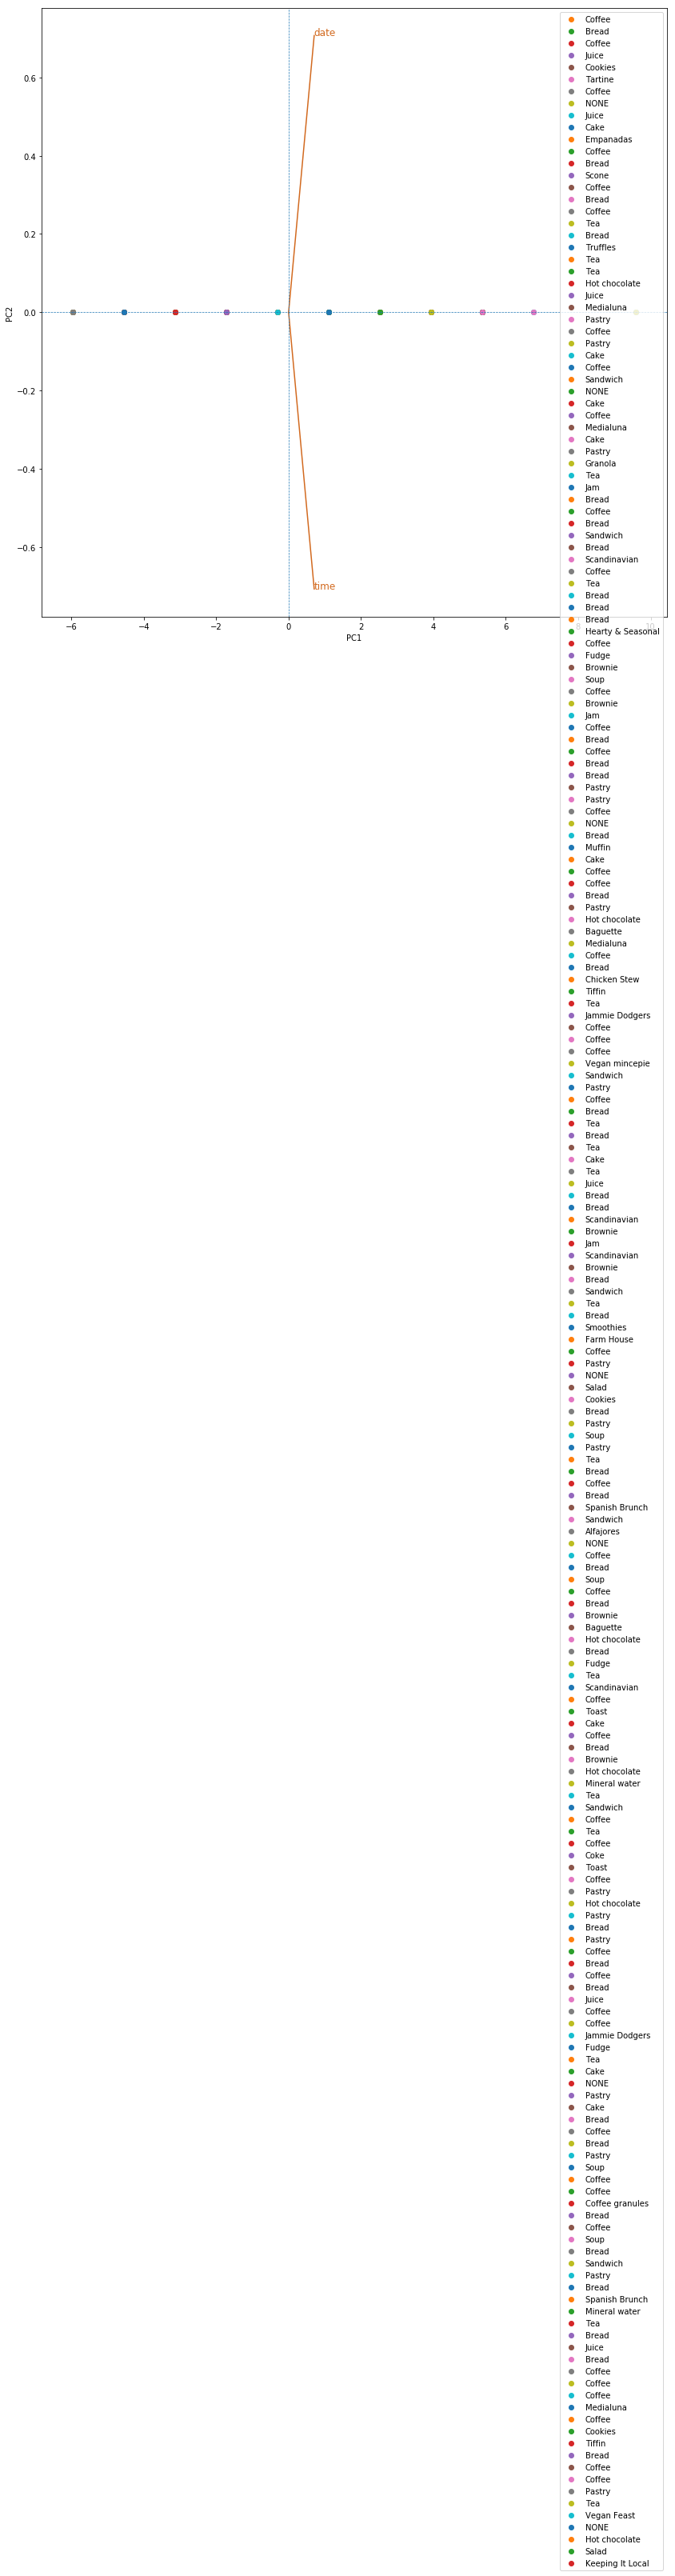

In [80]:
comp = pca1.components_

plt.figure(figsize=(14,14))
trans1 = pca1.fit_transform(X1)
plt.scatter(trans1[:,0],trans1[:,1])
for i in range(len(trans1)):
    plt.scatter(trans1[i,0],trans1[i,1],label=item1[i])
    #plt.text(trans1[i,0],trans1[i,1], item[i], fontsize=12,color='DodgerBlue')
    
plt.plot([0.,comp[0,0]],[0.,comp[1,0]],c='Chocolate')
plt.text(comp[0,0], comp[1,0], 'time', fontsize=12,color='Chocolate')
plt.plot([0.,comp[0,1]],[0.,comp[1,1]],c='Chocolate')
plt.text(comp[0,1], comp[1,1], 'date', fontsize=12,color='Chocolate')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0,linestyle='--',linewidth=0.7)
plt.axvline(0,linestyle='--',linewidth=0.7)
plt.legend()
plt.show()